In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def GenerateRandomUniform(N: int, theta: float) -> np.array:
    array = np.random.uniform(theta, 2 * theta, N)
    array.sort()
    return array

In [30]:
N = 100
theta = 9.9
generated = GenerateRandomUniform(N, theta)
print(f"θ = {theta} \nСгенерированная выборка = ", generated)

θ = 9.9 
Сгенерированная выборка =  [10.21307712 10.44218218 10.50052218 10.54007257 10.70635135 10.96361282
 11.01063492 11.04494605 11.11383858 11.14254147 11.14820232 11.16143245
 11.21145583 11.24934145 11.260487   11.27551022 11.28631632 11.29796733
 11.63472489 11.67001352 11.72599816 11.77235638 11.91361491 11.95619657
 12.04842934 12.06960622 12.15866822 12.26522294 12.28513133 12.32499488
 12.49551538 12.65854138 12.78734614 12.86193201 12.87676187 12.94525089
 13.10189202 13.18367743 13.40130155 13.40845129 13.52599178 13.52614985
 13.95390531 14.0147399  14.01968762 14.02379511 14.06081405 14.13946321
 14.33287839 14.44528268 14.48704103 14.56836766 14.68421497 14.87178661
 14.97912083 15.16452344 15.17209402 15.17740968 15.21380108 15.21526358
 15.33907329 15.51438965 15.53547297 15.56523921 15.69945519 15.82704067
 15.93103252 15.95173232 16.29604665 16.30210641 16.51521018 16.82351713
 16.90639308 17.22438586 17.24058631 17.24915943 17.31826173 17.32749876
 17.35859414 17

## Точный доверительный интервал 

In [31]:
def ConfidenceIntervalАccurateTheta(sample):
    x_max = np.max(sample)
    n = len(sample)
    t1 = np.power(0.025, 1 / n) + 1
    t2 = np.power(0.975, 1 / n) + 1
    left = x_max / t2
    right = x_max / t1
    return (left, right)

In [32]:
a, b = ConfidenceIntervalАccurateTheta(generated)
print(a, b)
print("Точный доверительный интервал. Длина =", b - a)

9.872972180775152 10.053779856395186
Точный доверительный интервал. Длина = 0.1808076756200343


## Асимптотический доверительный интервал. ОММ

In [33]:
def ConfidenceIntervalAsymptoticThetaOMM(x):
    x_avg = np.mean(x)
    g_alpha = 2 / 3 * x_avg  
    n = len(x)
    alpha_1 = x_avg
    alpha_2 = np.mean(x * x)
    same_part =  1.96 * 2 * np.sqrt(alpha_2 - alpha_1 ** 2) / n ** 0.5 / 3
    left = - same_part + g_alpha
    right = same_part + g_alpha
    return (left, right)

In [34]:
a, b = ConfidenceIntervalAsymptoticThetaOMM(generated)
print(a, b)
print("Асимптотический ОММ. Длина =", b - a)

9.40348859078137 10.139192240313756
Асимптотический ОММ. Длина = 0.7357036495323861


## Bootstrap

In [35]:
def BootstrapGenerate(data, n_bootstrap_samples=1000):
    return [np.random.choice(data, size=len(data), replace=True) for _ in range(n_bootstrap_samples)]

In [36]:
def UniformGenerate(x, N):
    theta = max(x) / 2
    return [GenerateRandomUniform(len(x), theta) for _ in range(N)]

def BootstrapParametricTheta(x):
    N = 50000
    generated_with_model = UniformGenerate(x, N)
    theta_stars = []
    for current_sample in generated_with_model:
        theta_stars.append(np.mean(current_sample) * 2 / 3)
    theta_stars = np.sort(theta_stars)
    k1 = int((1 - 0.95) * N / 2) - 1
    k2 = int((1 + 0.95) * N / 2) - 1 
    return theta_stars[k1], theta_stars[k2]

In [37]:
a, b = BootstrapParametricTheta(generated)
print(a, b)
print("Параметрический bootstrap. Оценка - ОММ. Длина =", b - a)

9.497879631427287 10.243083587310112
Параметрический bootstrap. Оценка - ОММ. Длина = 0.7452039558828254


In [38]:
def BootstrapNonParametricTheta(sample):
    bootstrap_generated = BootstrapGenerate(sample, 1000)
    theta_star = 2 / 3  * np.mean(sample)
    delts = []
    for current_sample in bootstrap_generated:
        delts.append(2 / 3 * np.mean(current_sample) - theta_star)
    delts.sort()
    return (-delts[974] + theta_star , -delts[24] + theta_star)

In [39]:
a, b = BootstrapNonParametricTheta(generated)
print(a, b)
print("Непараметрический bootstrap. Оценка - ОММ. Длина =", b - a)

9.39194554763268 10.120664300654688
Непараметрический bootstrap. Оценка - ОММ. Длина = 0.7287187530220081


## Сравнение доверительных интервалов

In [40]:
def Compare(sample, func_list, names_list):
    h = 0
    for f in func_list:
        left, right = f(sample)
        x = np.linspace(left, right, len(sample))
        y = [h] * len(x)
        plt.plot(x, y)
        h -= 0.1 
    plt.legend(names_list)
    ax = plt.gca()
    ax.get_yaxis().set_visible(False)

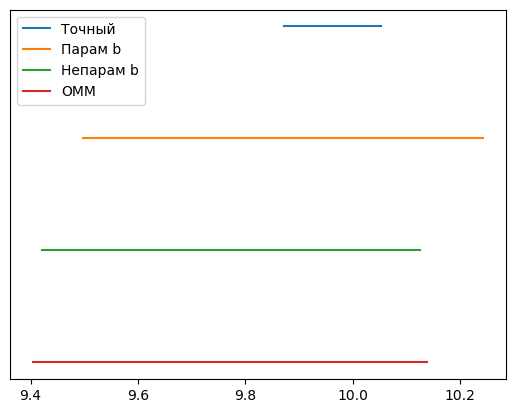

In [41]:
func_list = [ConfidenceIntervalАccurateTheta, BootstrapParametricTheta, BootstrapNonParametricTheta, ConfidenceIntervalAsymptoticThetaOMM]
names_list = ['Точный', 'Парам b', 'Непарам b', 'ОММ']
Compare(generated, func_list, names_list)